<a href="https://colab.research.google.com/github/SarahEldreny/Machine-Learning-Supervisied-Labs/blob/main/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 109 (delta 42), reused 94 (delta 27), pack-reused 0
Receiving objects: 100% (109/109), 33.19 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/machine_learning_1/polynomial_regression


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

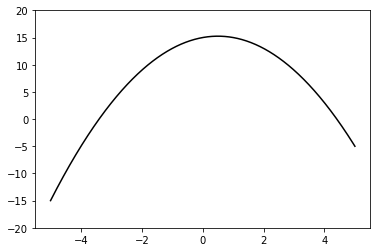

In [ ]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [ ]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

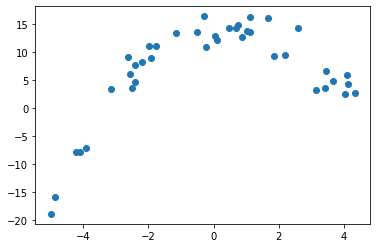

In [ ]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(degree=200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X
    return X
X_poly=addPoly(X,200)

In [ ]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y, test_size=0.2, train_size=0.8)

In [ ]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [ ]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_train, y_train,)

Training error (rmse): 0.014198353798005584
Testing error (rmse): 1.0936373671325713e+24


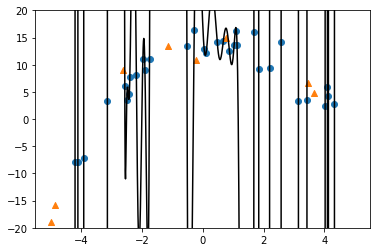

Polynomial coefficients
[17.490932647839358, -133.84563595101162, 681.1859488601771, 2094.218329630714, -11858.715457839628, -669.8769554726517, 49076.166179618995, -31916.75621942701, -66036.45535792722, 56546.53752747286, 47236.9482003907, -43105.96027503217, -21614.22888664744, 17987.382137523266, 6714.158601335643, -4334.681947767562, -1372.8755612592345, 579.0851518786136, 164.79912195836906, -34.52874332468128, -8.339636352864977, -0.169656948804695, -0.18321016151035605, 0.07256547497804534, 0.019317374902468744, 0.0018297471483358454, 0.0009886195396129507, -7.241842805639627e-05, -2.4077388296340986e-06, -6.821064963987018e-06, -2.5287574950741263e-06, -2.5102748882617146e-07, -1.580470082231952e-07, -3.5702002059367063e-09, -5.22152511671617e-09, 2.0024381042247905e-10, -2.728241089728246e-11, 2.0833420392745113e-11, 9.6560102273148e-12, 1.2630139279229095e-12, 8.661124542397916e-13, 5.980664979948485e-14, 5.029880759346691e-14, 2.575007243015972e-15, 2.3910183078918847e-15, 

In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.616740527886755, tolerance: 0.14031769353387072
  positive)


Training error (rmse): 1.698589993279303
Testing error (rmse): 485411430853.6533


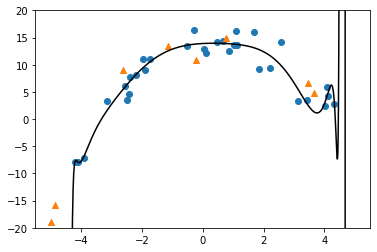

Polynomial coefficients
[13.90109379005651, 0.29145976505151133, -0.48463719259594906, 0.20151863475043522, -0.08016823850595037, -0.01913399835565049, 0.0020493629911473893, -0.00017330839192489326, 3.054789832014405e-05, 1.8689855631011474e-05, -5.511025559966066e-07, 1.2108237310042732e-06, -3.618109336532222e-08, 4.983222418235742e-08, -5.543723321683711e-10, 1.6329344463109796e-09, 5.035781576565017e-11, 4.110501331879682e-11, 5.8804875709772845e-12, 4.2602957232235427e-13, 4.157183267191812e-13, -3.947577677808941e-14, 2.45387505583656e-14, -4.146339356237449e-15, 1.3152832155669103e-15, -2.824071636446772e-16, 6.629443660390312e-17, -1.6610011966406424e-17, 3.1969817124227796e-18, -9.07222852644189e-19, 1.4880728554280245e-19, -4.736370387920384e-20, 6.709118234539108e-21, -2.396190284251235e-21, 2.927842481230954e-22, -1.1829662984163053e-22, 1.2299098825221015e-23, -5.7185528585270694e-24, 4.909271498694235e-25, -2.7101093389557036e-25, 1.8099891213659835e-26, -1.2585209239208

In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=0.1,normalize=True).fit(X_train,y_train)

Training error (rmse): 1.9303562394268177
Testing error (rmse): 50828434023.28381


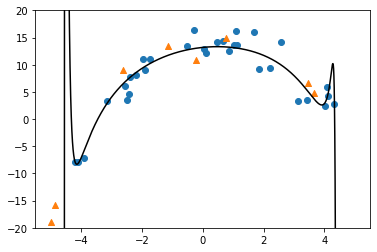

Polynomial coefficients
[13.184734852146473, 0.569190118775401, -0.5886733231389508, 0.007755042859979741, -0.017228324236918925, 4.207496325197163e-05, -0.0005141999059753196, 6.355966911617349e-06, -1.4786825263812573e-05, 8.620421090112184e-07, -3.5424166852453933e-07, 7.055755540194629e-08, -3.0450349246858117e-09, 4.614691956277019e-09, 4.3214268008844635e-10, 2.674179326081174e-10, 4.5441657787984944e-11, 1.4383186945328749e-11, 3.252774874485513e-12, 7.353938197436131e-13, 2.0291810147996258e-13, 3.6221449651957705e-14, 1.1782721365910078e-14, 1.7318654598045432e-15, 6.54366979940187e-16, 8.072527775113496e-17, 3.524073766278292e-17, 3.6751676694630496e-18, 1.8551904708156875e-18, 1.6341533567274643e-19, 9.595143584410393e-20, 7.081729245895717e-21, 4.892391042372598e-21, 2.976536436241741e-22, 2.4651955863508997e-22, 1.2021643477875144e-23, 1.2297386873883185e-23, 4.581952500685032e-25, 6.081060008769147e-25, 1.5846754533376206e-26, 2.98386682149343e-26, 4.455929198106093e-28, 

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-1.150989,13.436894,7.403964e+03,1.251952e+01,1.170634e+01
1,-2.613841,9.085322,6.111814e+02,5.504443e+00,6.511204e+00
2,-4.859583,-15.848719,2.671654e+22,-9.357424e+09,-7.150877e+08
3,-0.234030,10.927272,3.278147e+01,1.380353e+01,1.301913e+01
4,0.756510,14.859288,1.671090e+01,1.390084e+01,1.327606e+01
5,-4.988572,-18.893035,3.093158e+24,-1.372919e+12,-1.437627e+11
6,3.653099,4.833669,-1.213336e+10,1.339744e+00,3.725251e+00
7,3.444219,6.685961,-1.846787e+08,2.667763e+00,5.185157e+00
